In [44]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler

## Import dataset from download pipeline

In [8]:
df = pd.read_csv('filtered_cpg_healthy_filtered2.csv')
df = df.drop('Unnamed: 0', axis=1)
mean_df = df.groupby('dataset').mean()
std_df = df.groupby('dataset').std()

## Calculate z-score

In [9]:
joined_df = df.merge(mean_df, on=["dataset"], how="inner", suffixes=("", "_mean"))
joined_df = joined_df.merge(std_df, on=["dataset"], how="inner", suffixes=("", "_std"))

In [10]:
zscore_df = df.copy()
cols = list(df.columns)
cols.remove('dataset')
cols.remove('age')
cols.remove('name')

In [11]:
for col in cols:
    zscore_df[col] = (joined_df[col] - joined_df[f'{col}_mean']) / joined_df[f'{col}_std']

In [39]:
# Min-Max Normalize
# for col in cols:
#     zscore_df[col] = (zscore_df[col] - zscore_df[col].min()) / (zscore_df[col].max() - zscore_df[col].min())

In [12]:
zscore_df.head()

,name,dataset,age,cg00002426,cg00003994,cg00006414,cg00008493,cg00008713,cg00009407,cg00012199,...,cg27649764,cg27651218,cg27652350,cg27653134,cg27654142,cg27655905,cg27661264,cg27662379,cg27662877,cg27665659
0,GSM501487,GSE20067,17.0,-0.102215,1.949565,1.240191,-0.267996,0.364289,-0.479425,1.070175,...,0.383582,0.351539,0.730574,-0.378860,0.189453,-0.105661,-0.323224,0.344420,0.973335,0.402202
1,GSM501488,GSE20067,15.0,-0.849132,0.346426,-0.726774,0.064281,1.864511,0.875378,-0.095798,...,0.009536,-0.295619,-0.777717,-1.191327,-0.641567,0.297058,0.902682,-0.144805,0.367724,-0.025080
2,GSM501489,GSE20067,13.0,0.786939,0.266235,0.498815,0.319924,0.370949,0.180545,-0.259411,...,0.215709,0.514026,-0.032488,-1.541603,0.056430,-0.222894,-0.426195,0.283925,-0.607440,0.033233
3,GSM501490,GSE20067,22.0,0.352206,-0.070817,-0.296718,0.593945,0.081114,0.193643,0.637754,...,-0.494552,0.341368,-0.153154,0.177306,-0.049926,-0.180676,0.231757,-0.203984,-0.646038,0.040006
4,GSM501491,GSE20067,29.0,0.262800,-0.092829,-0.395950,-0.310909,0.513381,0.138801,-0.455448,...,-0.728301,-0.091681,-0.490833,1.182537,0.665235,0.484004,0.000089,-0.168893,-0.251279,0.025711


In [13]:
zscore_df.to_csv('zscore2.csv')

In [4]:
#zscore_df = pd.read_csv('zscore_minmaxnorm.csv')
#zscore_df = zscore_df.drop('Unnamed: 0', axis=1)

## Upsampling

In [18]:
df_np = zscore_df.dropna().to_numpy()
X = df_np[:, 3:]
y = df_np[:, 2].astype(int)

<AxesSubplot:>

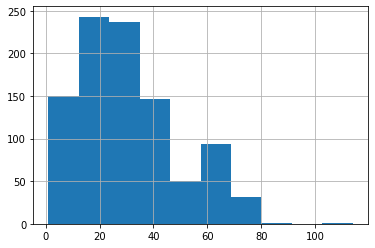

In [40]:
zscore_df['age'].hist()

In [66]:
oversample = RandomOverSampler(sampling_strategy='all')
X_over, y_over = oversample.fit_resample(X, y)

In [73]:
up_df = pd.DataFrame(X_over, columns=df.columns[3:])
up_df['age'] = y_over

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

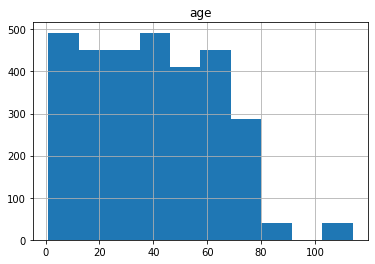

In [71]:
pd.DataFrame(y_over, columns=df.columns[2:3]).hist()

# Feature Selection

In [77]:
up_df.head()

,cg00002426,cg00003994,cg00006414,cg00008493,cg00008713,cg00009407,cg00012199,cg00012386,cg00012792,cg00013618,...,cg27651218,cg27652350,cg27653134,cg27654142,cg27655905,cg27661264,cg27662379,cg27662877,cg27665659,age
0,-0.102215,1.949565,1.240191,-0.267996,0.364289,-0.479425,1.070175,-0.076412,0.319448,-0.876888,...,0.351539,0.730574,-0.378860,0.189453,-0.105661,-0.323224,0.344420,0.973335,0.402202,17
1,-0.849132,0.346426,-0.726774,0.064281,1.864511,0.875378,-0.095798,-0.238748,0.249780,-0.552322,...,-0.295619,-0.777717,-1.191327,-0.641567,0.297058,0.902682,-0.144805,0.367724,-0.025080,15
2,0.786939,0.266235,0.498815,0.319924,0.370949,0.180545,-0.259411,-0.359771,0.004087,-1.233488,...,0.514026,-0.032488,-1.541603,0.056430,-0.222894,-0.426195,0.283925,-0.607440,0.033233,13
3,0.352206,-0.070817,-0.296718,0.593945,0.081114,0.193643,0.637754,0.636538,0.099258,0.125958,...,0.341368,-0.153154,0.177306,-0.049926,-0.180676,0.231757,-0.203984,-0.646038,0.040006,22
4,0.262800,-0.092829,-0.395950,-0.310909,0.513381,0.138801,-0.455448,-0.744506,-0.137856,0.211776,...,-0.091681,-0.490833,1.182537,0.665235,0.484004,0.000089,-0.168893,-0.251279,0.025711,29


## ~~Variance Threshold~~ - not efficacious

In [13]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.98 * (1 - .98)))
sel.fit(X)
filtered_df = zscore_df[np.array(['name','age'] + list(zscore_df.columns[sel.get_support(indices=True)]))]
filtered_df.shape

(955, 1917)

## Tree Feature Selection

In [84]:
df_np = up_df.dropna().to_numpy()
X = df_np[:, 1:]
y = df_np[:, 1].astype(int)

In [85]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [86]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_

array([9.28644947e-03, 0.00000000e+00, 0.00000000e+00, ...,
       0.00000000e+00, 2.71110999e-05, 1.55636581e-04])

Tree feature selection, most important features

In [87]:
zscore_df.columns[clf.feature_importances_.argsort()[-10:][::-1] + 3]

Index(['cg00002426', 'cg26336164', 'cg21486954', 'cg08707078', 'cg12729048',
       'cg19832597', 'cg22019980', 'cg12699371', 'cg14588638', 'cg18488623'],
      dtype='object')

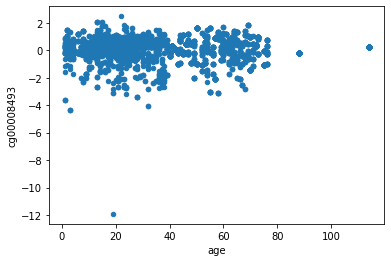

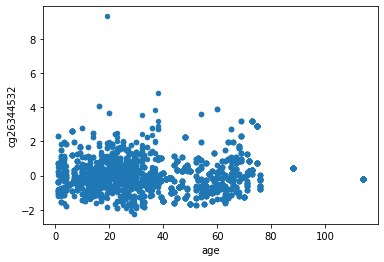

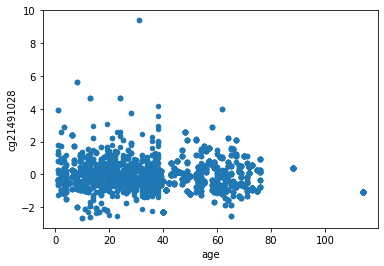

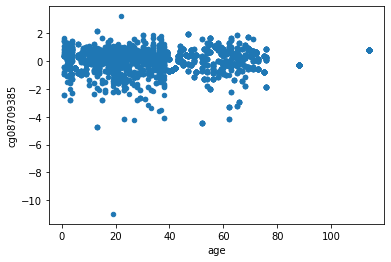

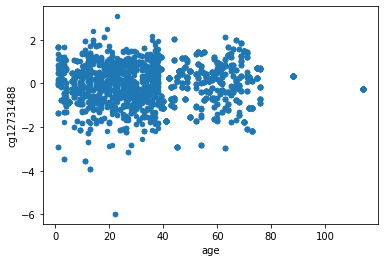

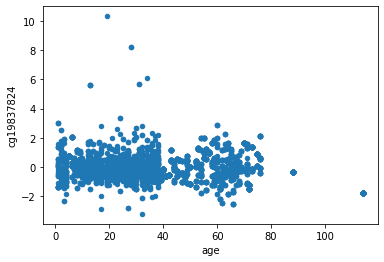

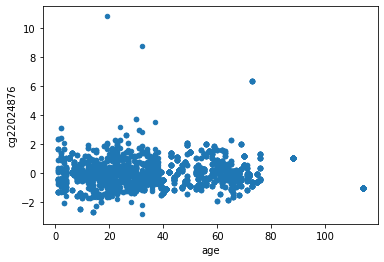

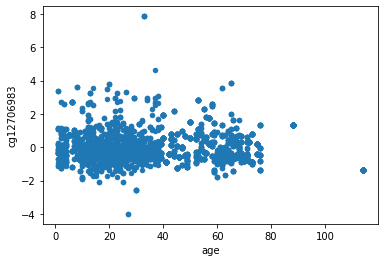

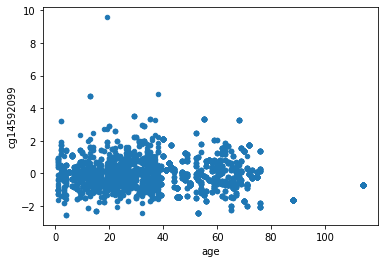

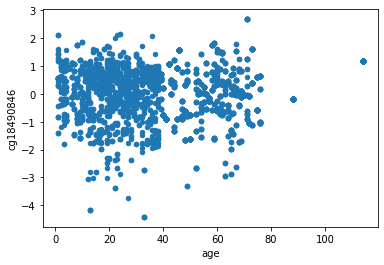

In [88]:
for col in up_df.columns[clf.feature_importances_.argsort()[-10:][::-1] + 3]:
    up_df.plot.scatter(x='age', y=col)

## Pearson Correlation

In [89]:
corr_dict = {}
for col in cols:
    corr_dict[col] = abs(up_df['age'].corr(up_df[col]))

Pearson correlation, most important features

In [90]:
print(sorted(corr_dict, key=corr_dict.get, reverse=True)[:10])

['cg11919694', 'cg10052840', 'cg11158729', 'cg00138126', 'cg10660256', 'cg00503840', 'cg13975369', 'cg21794225', 'cg19722847', 'cg12758687']


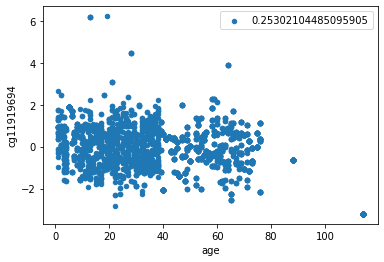

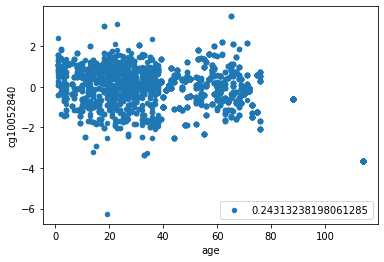

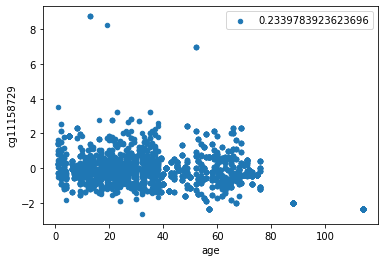

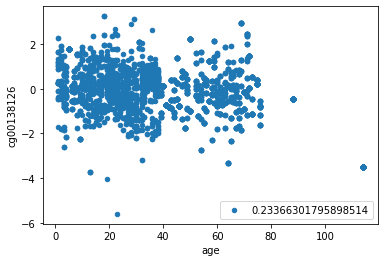

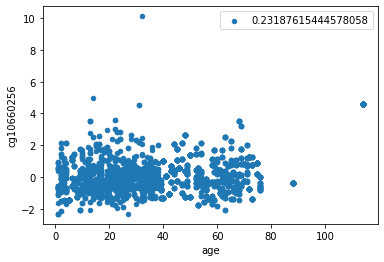

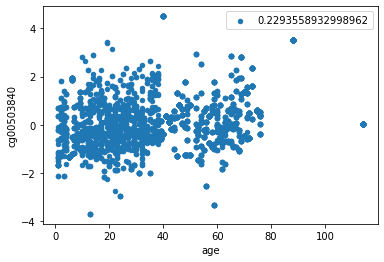

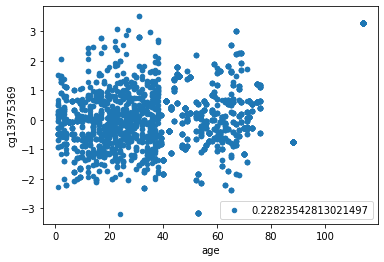

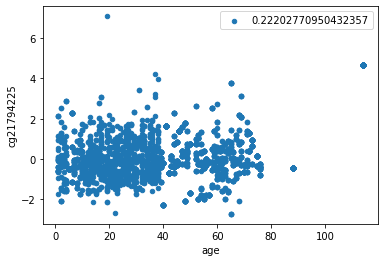

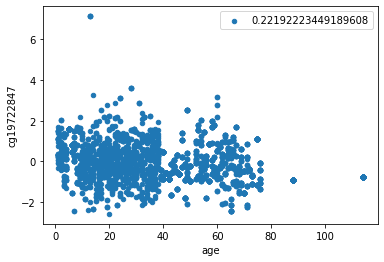

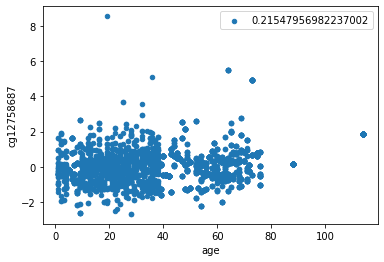

In [91]:
for col in sorted(corr_dict, key=corr_dict.get, reverse=True)[:10]:
    up_df.plot.scatter(x='age', y=col, label=str(corr_dict[col]))

## Chi-2

In [93]:
minmaxnorm_df = up_df.copy()
# Min-Max Normalize
for col in cols:
    minmaxnorm_df[col] = (minmaxnorm_df[col] - minmaxnorm_df[col].min()) / (minmaxnorm_df[col].max() - minmaxnorm_df[col].min())

In [94]:
minmaxnorm_df.head()

,cg00002426,cg00003994,cg00006414,cg00008493,cg00008713,cg00009407,cg00012199,cg00012386,cg00012792,cg00013618,...,cg27651218,cg27652350,cg27653134,cg27654142,cg27655905,cg27661264,cg27662379,cg27662877,cg27665659,age
0,0.692922,0.469476,0.441218,0.809148,0.359761,0.206544,0.298497,0.234740,0.242711,0.677371,...,0.819343,0.369730,0.607896,0.273345,0.302666,0.374665,0.229588,0.272850,0.201851,17
1,0.611670,0.285610,0.243416,0.832223,0.466270,0.345134,0.212415,0.220124,0.238607,0.710526,...,0.764152,0.205453,0.500558,0.183587,0.349415,0.543393,0.194760,0.223401,0.175202,15
2,0.789646,0.276413,0.366664,0.849976,0.360234,0.274056,0.200335,0.209227,0.224133,0.640944,...,0.833201,0.286620,0.454282,0.258977,0.289058,0.360493,0.225282,0.143778,0.178839,13
3,0.742354,0.237756,0.286663,0.869006,0.339657,0.275396,0.266572,0.298933,0.229740,0.779813,...,0.818476,0.273478,0.681374,0.247490,0.293959,0.451050,0.190547,0.140627,0.179262,22
4,0.732629,0.235231,0.276684,0.806167,0.370346,0.269786,0.185862,0.174586,0.215771,0.788579,...,0.781544,0.236699,0.814178,0.324733,0.371116,0.419165,0.193045,0.172859,0.178370,29


In [95]:
df_np = minmaxnorm_df.dropna().to_numpy()
normX = df_np[:, 3:]
normy = df_np[:, 2].astype(int)

In [96]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

clf = SelectKBest(chi2, k=10).fit(normX, normy)

Chi-2, most important features

In [97]:
minmaxnorm_df.columns[clf.get_support(indices=True).argsort()[::-1] + 3]

Index(['cg00015770', 'cg00014837', 'cg00014085', 'cg00013618', 'cg00012792',
       'cg00012386', 'cg00012199', 'cg00009407', 'cg00008713', 'cg00008493'],
      dtype='object')

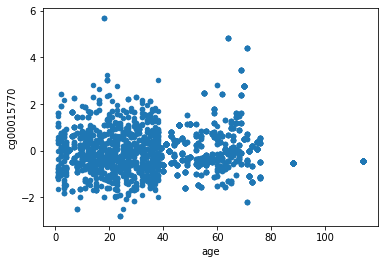

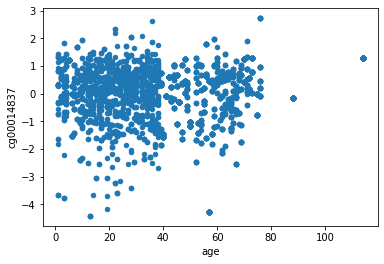

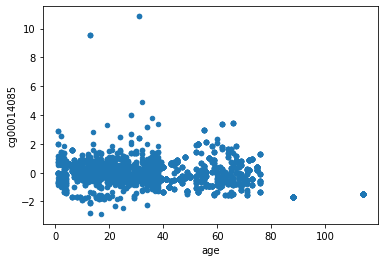

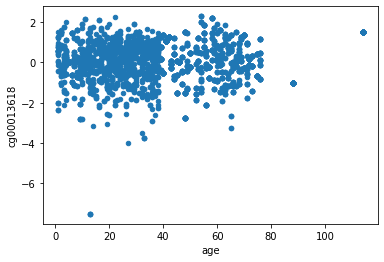

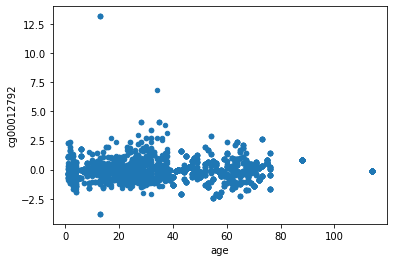

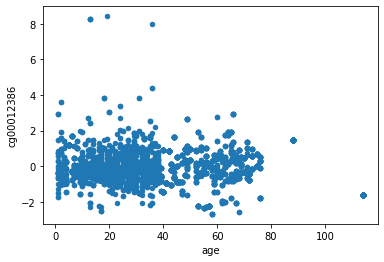

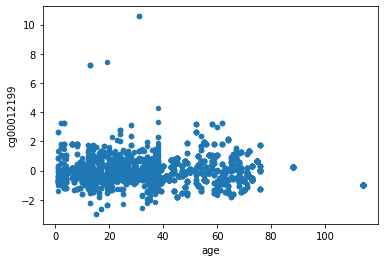

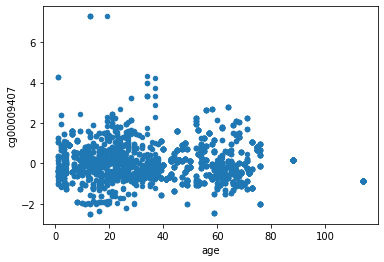

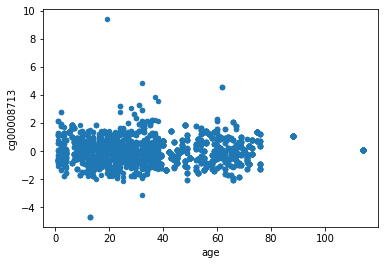

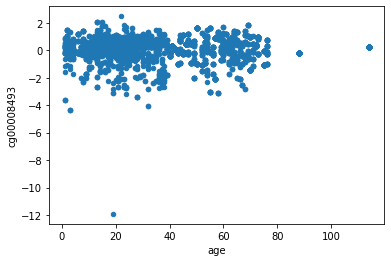

In [100]:
for col in minmaxnorm_df.columns[clf.get_support(indices=True).argsort()[::-1] + 3]:
    up_df.plot.scatter(x='age', y=col)

## Export CpG Sites
Export methylation sites that exhibited greatest Pearson correlation with age

In [112]:
selected_cpg = sorted(corr_dict, key=corr_dict.get, reverse=True)[:10]

In [103]:
up_df[['age'] + selected_cpg].to_csv('healthy_top10.csv')
minmaxnorm_df[['age'] + selected_cpg].to_csv('healthy_top10_minmaxnorm.csv')

Import Diabetes Type I patient data, compute z-score + min-max norm, and export

In [114]:
diab_df = pd.read_csv('diabetes_raw.csv')
diab_df = diab_df.drop('Unnamed: 0', axis=1)
diab_df = diab_df[['dataset', 'age'] + selected_cpg]
diab_df = diab_df.dropna(axis=0)
diab_mean_df = diab_df.groupby('dataset').mean()
diab_std_df = diab_df.groupby('dataset').std()

In [116]:
diab_joined_df = diab_df.merge(diab_mean_df, on=["dataset"], how="inner", suffixes=("", "_mean"))
diab_joined_df = diab_joined_df.merge(diab_std_df, on=["dataset"], how="inner", suffixes=("", "_std"))

In [118]:
diab_zscore_df = diab_df.copy()
cols = list(diab_df.columns)
cols.remove('dataset')
cols.remove('age')

In [119]:
for col in cols:
    diab_zscore_df[col] = (diab_joined_df[col] - diab_joined_df[f'{col}_mean']) / diab_joined_df[f'{col}_std']

Upsample

<AxesSubplot:>

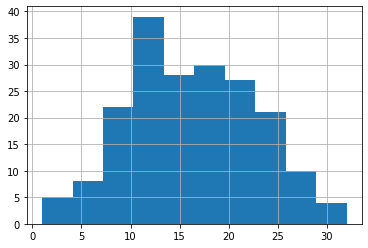

In [121]:
diab_zscore_df['age'].hist()

In [122]:
diab_zscore_df.head()

,dataset,age,cg11919694,cg10052840,cg11158729,cg00138126,cg10660256,cg00503840,cg13975369,cg21794225,cg19722847,cg12758687
0,GSE20067,17.0,-0.414957,-0.088557,0.834548,-1.033511,0.437598,1.301262,-1.132132,0.747152,0.752552,-0.081505
1,GSE20067,15.0,0.202192,-0.950471,-0.497225,-0.054878,-0.144430,-0.140077,0.824929,-0.510642,1.768367,-0.743147
2,GSE20067,13.0,0.366040,0.038033,0.338237,0.443431,-0.354937,0.971965,0.475659,0.768466,0.269322,0.736457
3,GSE20067,22.0,-0.420783,1.028812,-0.273819,-0.023699,-0.019246,-0.265786,1.119223,-0.548695,-0.444032,-0.131725
4,GSE20067,29.0,0.928198,-0.417655,0.389828,0.043038,0.444937,0.779433,0.180370,-0.080702,-0.694885,0.870808


In [125]:
df_np = diab_zscore_df.dropna().to_numpy()
X = df_np[:, 2:]
y = df_np[:, 1].astype(int)

In [127]:
oversample = RandomOverSampler(sampling_strategy='all')
X_over, y_over = oversample.fit_resample(X, y)

In [129]:
diab_up_df = pd.DataFrame(X_over, columns=diab_df.columns[2:])
diab_up_df['age'] = y_over

<AxesSubplot:>

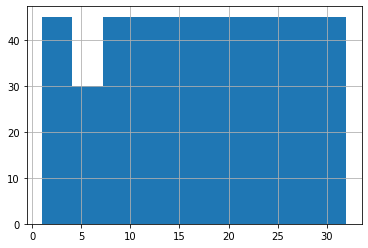

In [131]:
diab_up_df['age'].hist()

Export

In [132]:
diab_up_df.to_csv('diabetic_top10.csv')

In [133]:
diab_mmn_df = diab_up_df.copy()
# Min-Max Normalize
for col in cols:
    diab_mmn_df[col] = (diab_mmn_df[col] - diab_mmn_df[col].min()) / (diab_mmn_df[col].max() - diab_mmn_df[col].min())
diab_mmn_df.to_csv('diabetic_top10_minmaxnorm.csv')